In [1]:
# Chapter 10 Lab 1: Principal Components Analysis

states=row.names(USArrests)
states
names(USArrests)


[1] "Alabama"        "Alaska"         "Arizona"        "Arkansas"      
 [5] "California"     "Colorado"       "Connecticut"    "Delaware"      
 [9] "Florida"        "Georgia"        "Hawaii"         "Idaho"         
[13] "Illinois"       "Indiana"        "Iowa"           "Kansas"        
[17] "Kentucky"       "Louisiana"      "Maine"          "Maryland"      
[21] "Massachusetts"  "Michigan"       "Minnesota"      "Mississippi"   
[25] "Missouri"       "Montana"        "Nebraska"       "Nevada"        
[29] "New Hampshire"  "New Jersey"     "New Mexico"     "New York"      
[33] "North Carolina" "North Dakota"   "Ohio"           "Oklahoma"      
[37] "Oregon"         "Pennsylvania"   "Rhode Island"   "South Carolina"
[41] "South Dakota"   "Tennessee"      "Texas"          "Utah"          
[45] "Vermont"        "Virginia"       "Washington"     "West Virginia" 
[49] "Wisconsin"      "Wyoming"

[1] "Murder"   "Assault"  "UrbanPop" "Rape"

In [2]:
apply(USArrests, 2, mean)
apply(USArrests, 2, var)


Murder  Assault UrbanPop     Rape 
   7.788  170.760   65.540   21.232

Murder    Assault   UrbanPop       Rape 
  18.97047 6945.16571  209.51878   87.72916

In [6]:
pr.out=prcomp(USArrests, scale=TRUE)
names(pr.out)
pr.out$center
pr.out$scale
pr.out$rotation
dim(pr.out$x)


[1] "sdev"     "rotation" "center"   "scale"    "x"

Murder  Assault UrbanPop     Rape 
   7.788  170.760   65.540   21.232

Murder   Assault  UrbanPop      Rape 
 4.355510 83.337661 14.474763  9.366385

,PC1,PC2,PC3,PC4
Murder,-0.5358995,0.4181809,-0.3412327,0.64922780
Assault,-0.5831836,0.1879856,-0.2681484,-0.74340748
UrbanPop,-0.2781909,-0.8728062,-0.3780158,0.13387773
Rape,-0.5434321,-0.1673186,0.8177779,0.08902432


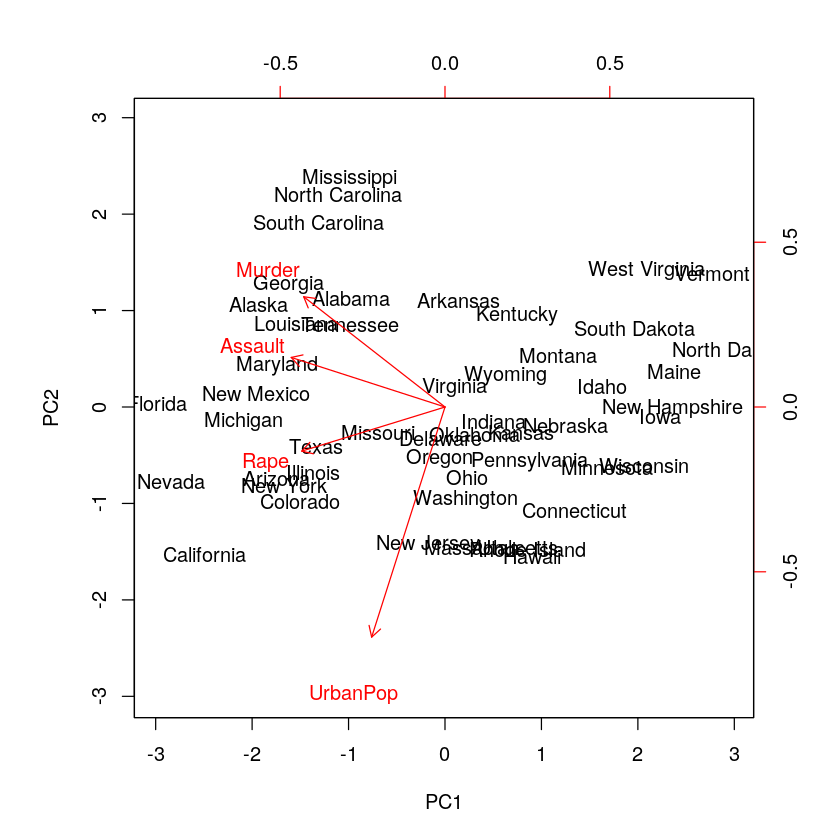

In [7]:
biplot(pr.out, scale=0)


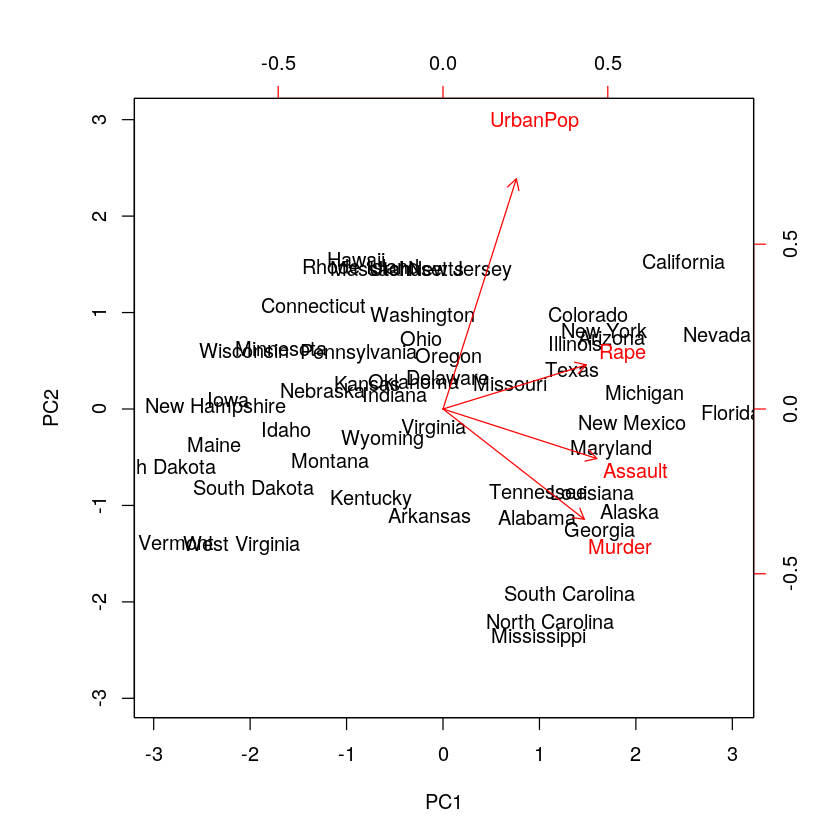

In [8]:
pr.out$rotation=-pr.out$rotation
pr.out$x=-pr.out$x
biplot(pr.out, scale=0)


In [9]:
pr.out$sdev
pr.var=pr.out$sdev^2
pr.var


[1] 1.5748783 0.9948694 0.5971291 0.4164494

[1] 2.4802416 0.9897652 0.3565632 0.1734301

In [10]:
pve=pr.var/sum(pr.var)
pve


[1] 0.62006039 0.24744129 0.08914080 0.04335752

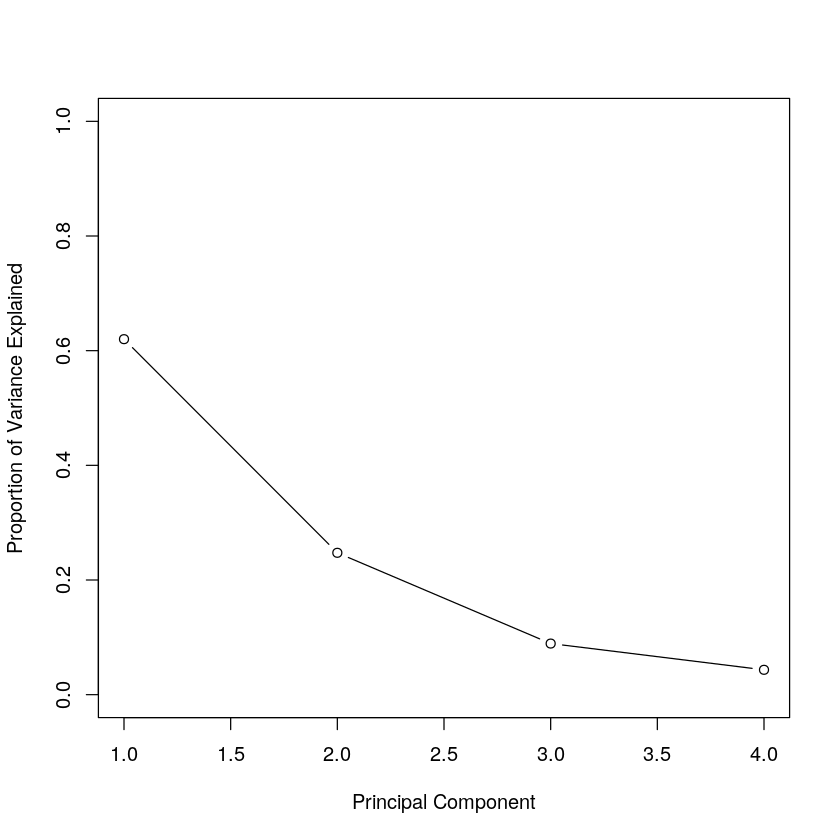

In [11]:
plot(pve, xlab="Principal Component", ylab="Proportion of Variance Explained", ylim=c(0,1),type='b')


[1]  1  3 11  8

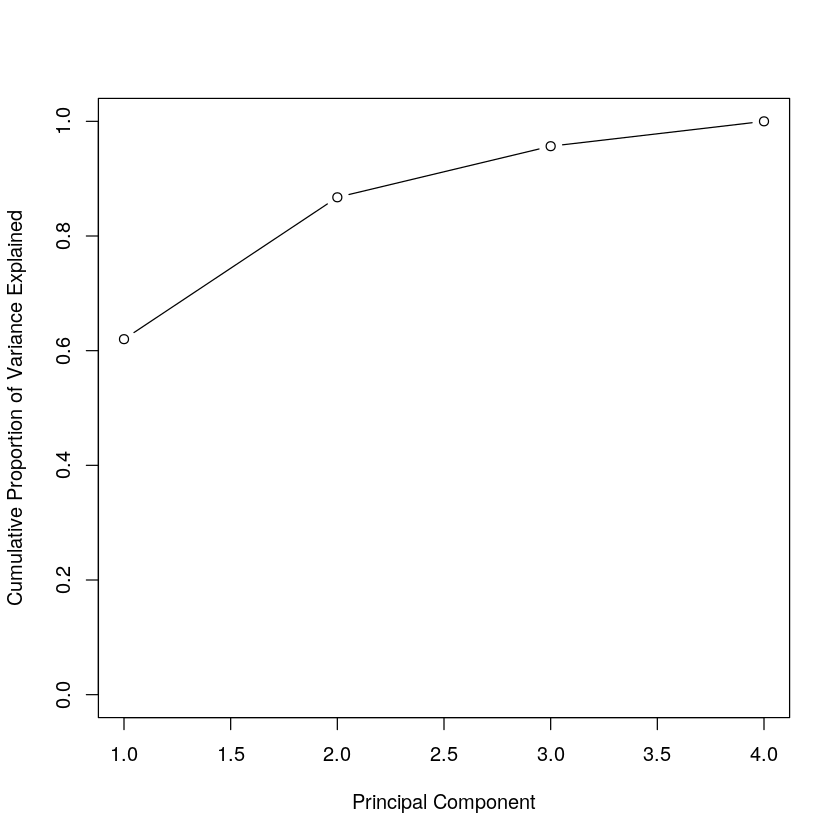

In [12]:
plot(cumsum(pve), xlab="Principal Component", ylab="Cumulative Proportion of Variance Explained", ylim=c(0,1),type='b')
a=c(1,2,8,-3)
cumsum(a)

In [13]:
# Chapter 10 Lab 2: Clustering

# K-Means Clustering

set.seed(2)
x=matrix(rnorm(50*2), ncol=2)
x[1:25,1]=x[1:25,1]+3
x[1:25,2]=x[1:25,2]-4


In [14]:
km.out=kmeans(x,2,nstart=20)
km.out$cluster


[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 2 2 2 2 2 2 2 2 2 2

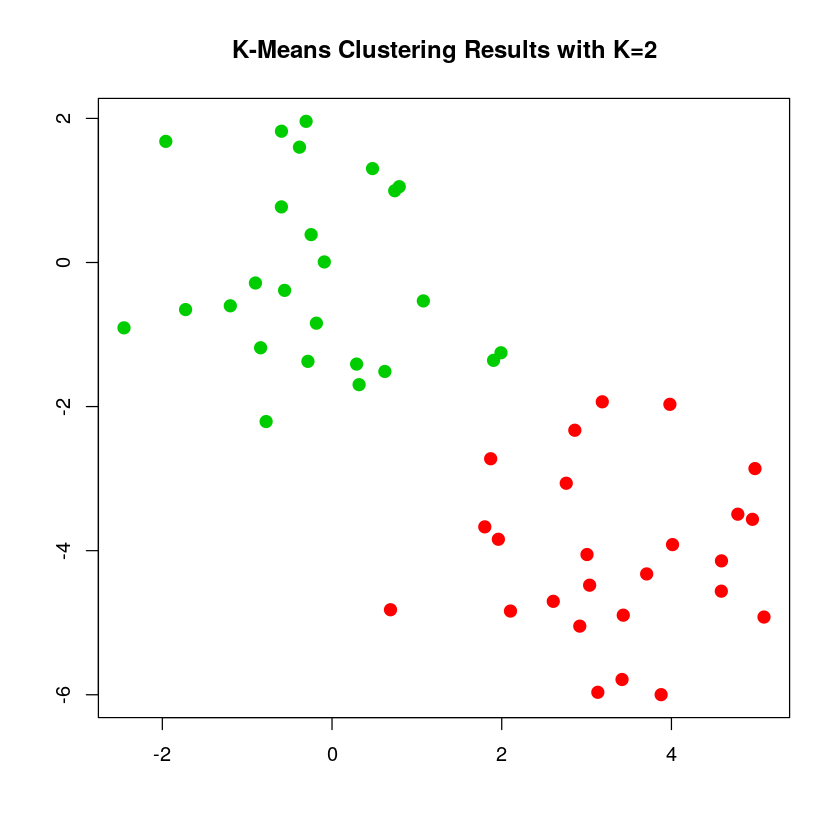

In [15]:
plot(x, col=(km.out$cluster+1), main="K-Means Clustering Results with K=2", xlab="", ylab="", pch=20, cex=2)


K-means clustering with 3 clusters of sizes 17, 23, 10

Cluster means:
        [,1]        [,2]
1  3.7789567 -4.56200798
2 -0.3820397 -0.08740753
3  2.3001545 -2.69622023

Clustering vector:
 [1] 1 3 1 3 1 1 1 3 1 3 1 3 1 3 1 3 1 1 1 1 1 3 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 2 2 2 3 2 3 2 2 2 2

Within cluster sum of squares by cluster:
[1] 25.74089 52.67700 19.56137
 (between_SS / total_SS =  79.3 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

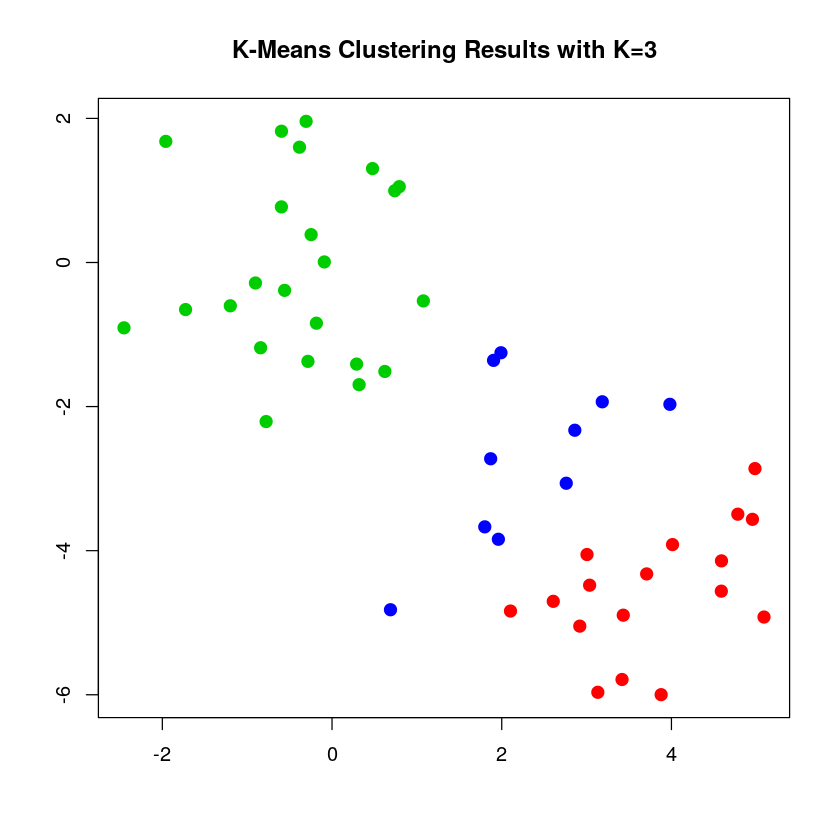

In [16]:
set.seed(4)
km.out=kmeans(x,3,nstart=20)
km.out
plot(x, col=(km.out$cluster+1), main="K-Means Clustering Results with K=3", xlab="", ylab="", pch=20, cex=2)


In [17]:
set.seed(3)
km.out=kmeans(x,3,nstart=1)
km.out$tot.withinss
km.out=kmeans(x,3,nstart=20)
km.out$tot.withinss

[1] 97.97927

[1] 97.97927

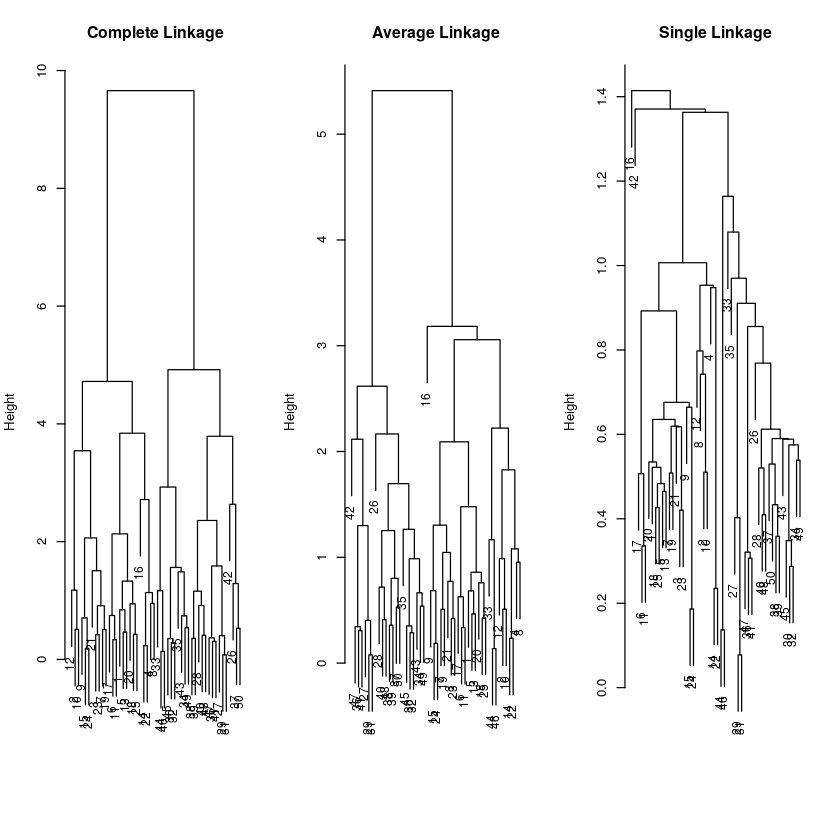

In [18]:

# Hierarchical Clustering

hc.complete=hclust(dist(x), method="complete")
hc.average=hclust(dist(x), method="average")
hc.single=hclust(dist(x), method="single")
par(mfrow=c(1,3))
plot(hc.complete,main="Complete Linkage", xlab="", sub="", cex=.9)
plot(hc.average, main="Average Linkage", xlab="", sub="", cex=.9)
plot(hc.single, main="Single Linkage", xlab="", sub="", cex=.9)


[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 2 2 2 2 2 2 2 2 2 2

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 1 2 2 2 2 2
[39] 2 2 2 2 2 1 2 1 2 2 2 2

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[39] 1 1 1 1 1 1 1 1 1 1 1 1

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3
[39] 3 3 3 4 3 3 3 3 3 3 3 3

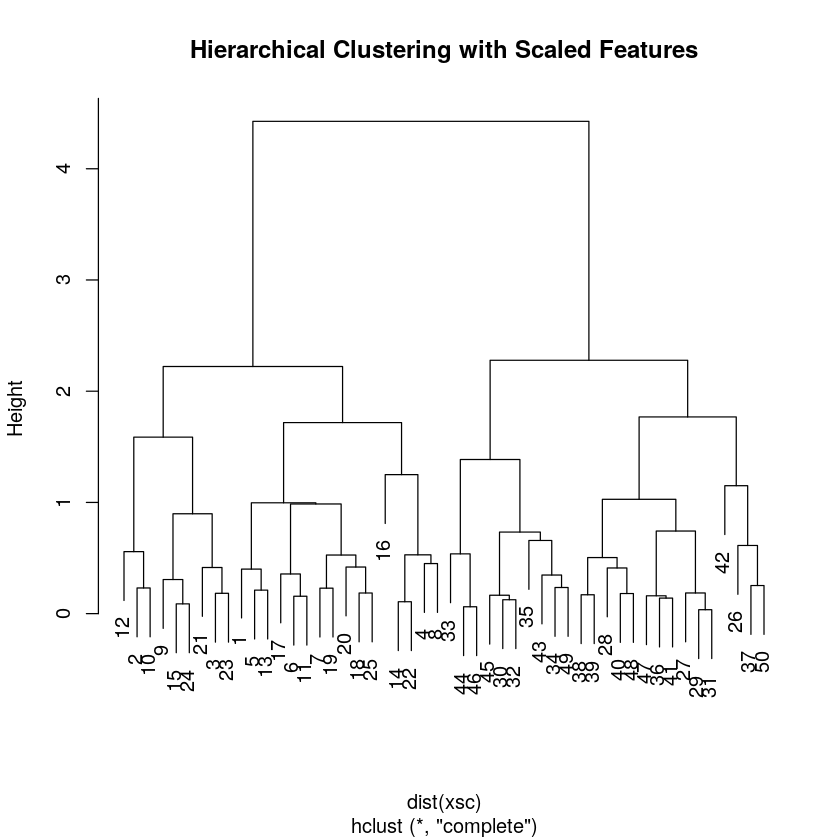

In [19]:
cutree(hc.complete, 2)
cutree(hc.average, 2)
cutree(hc.single, 2)
cutree(hc.single, 4)
xsc=scale(x)
plot(hclust(dist(xsc), method="complete"), main="Hierarchical Clustering with Scaled Features")


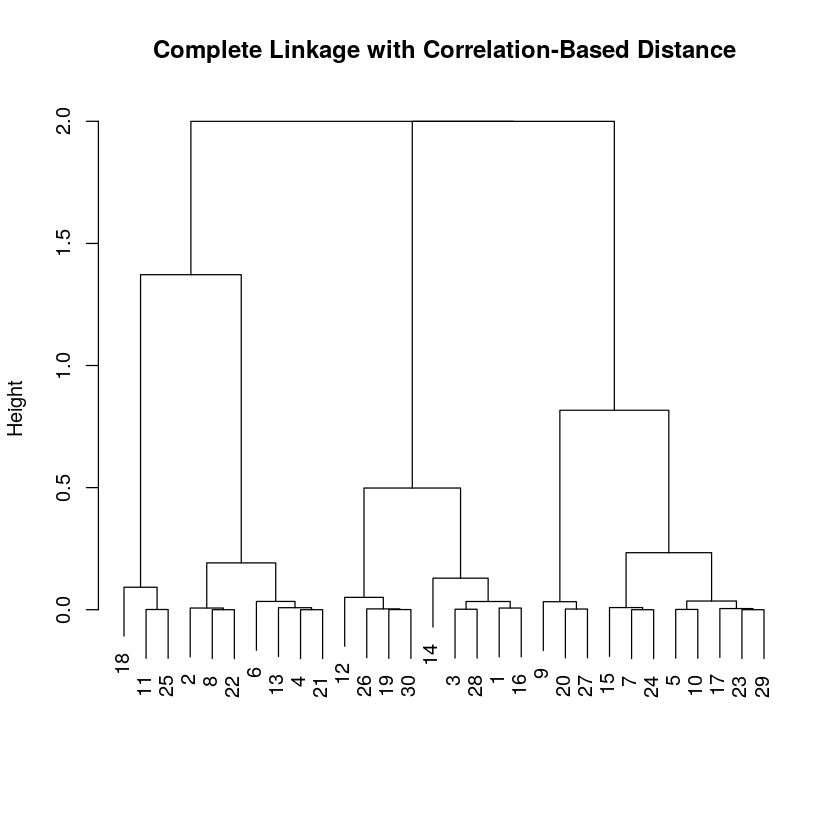

In [20]:
x=matrix(rnorm(30*3), ncol=3)
dd=as.dist(1-cor(t(x)))
plot(hclust(dd, method="complete"), main="Complete Linkage with Correlation-Based Distance", xlab="", sub="")



In [21]:
# Chapter 10 Lab 3: NCI60 Data Example

# The NCI60 data

library(ISLR)
nci.labs=NCI60$labs
nci.data=NCI60$data
dim(nci.data)
nci.labs[1:4]
table(nci.labs)

[1]   64 6830

[1] "CNS"   "CNS"   "CNS"   "RENAL"

nci.labs
     BREAST         CNS       COLON K562A-repro K562B-repro    LEUKEMIA 
          7           5           7           1           1           6 
MCF7A-repro MCF7D-repro    MELANOMA       NSCLC     OVARIAN    PROSTATE 
          1           1           8           9           6           2 
      RENAL     UNKNOWN 
          9           1 

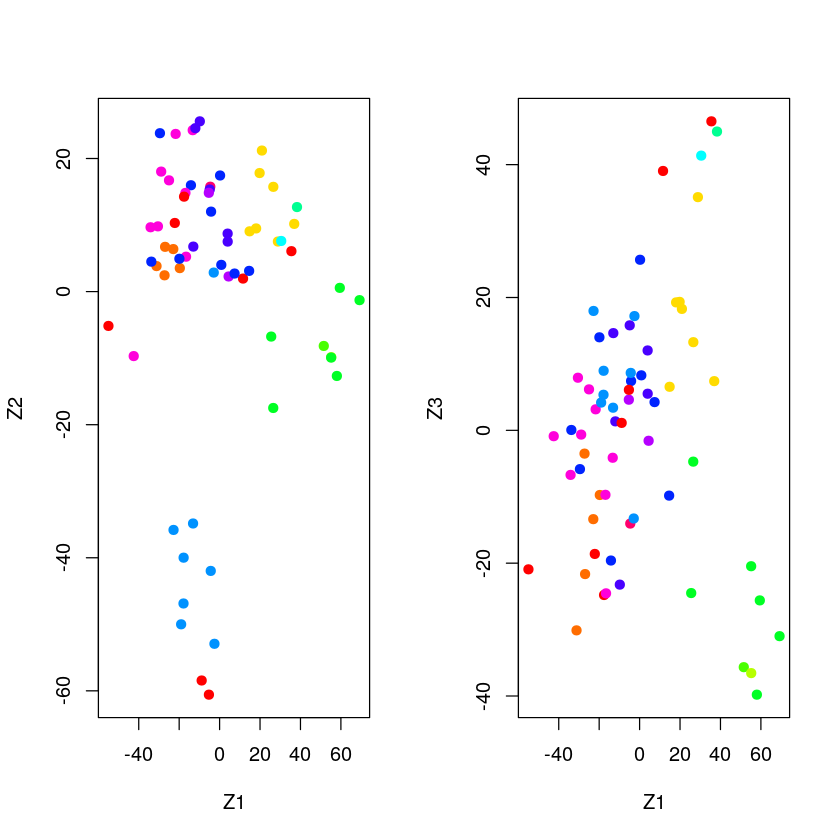

In [22]:
# PCA on the NCI60 Data

pr.out=prcomp(nci.data, scale=TRUE)
Cols=function(vec){
    cols=rainbow(length(unique(vec)))
    return(cols[as.numeric(as.factor(vec))])
  }
par(mfrow=c(1,2))
plot(pr.out$x[,1:2], col=Cols(nci.labs), pch=19,xlab="Z1",ylab="Z2")
plot(pr.out$x[,c(1,3)], col=Cols(nci.labs), pch=19,xlab="Z1",ylab="Z3")


Importance of components:
                           PC1      PC2      PC3      PC4      PC5      PC6
Standard deviation     27.8535 21.48136 19.82046 17.03256 15.97181 15.72108
Proportion of Variance  0.1136  0.06756  0.05752  0.04248  0.03735  0.03619
Cumulative Proportion   0.1136  0.18115  0.23867  0.28115  0.31850  0.35468
                            PC7      PC8      PC9     PC10     PC11     PC12
Standard deviation     14.47145 13.54427 13.14400 12.73860 12.68672 12.15769
Proportion of Variance  0.03066  0.02686  0.02529  0.02376  0.02357  0.02164
Cumulative Proportion   0.38534  0.41220  0.43750  0.46126  0.48482  0.50646
                           PC13     PC14     PC15     PC16     PC17     PC18
Standard deviation     11.83019 11.62554 11.43779 11.00051 10.65666 10.48880
Proportion of Variance  0.02049  0.01979  0.01915  0.01772  0.01663  0.01611
Cumulative Proportion   0.52695  0.54674  0.56590  0.58361  0.60024  0.61635
                           PC19    PC20     PC21    PC

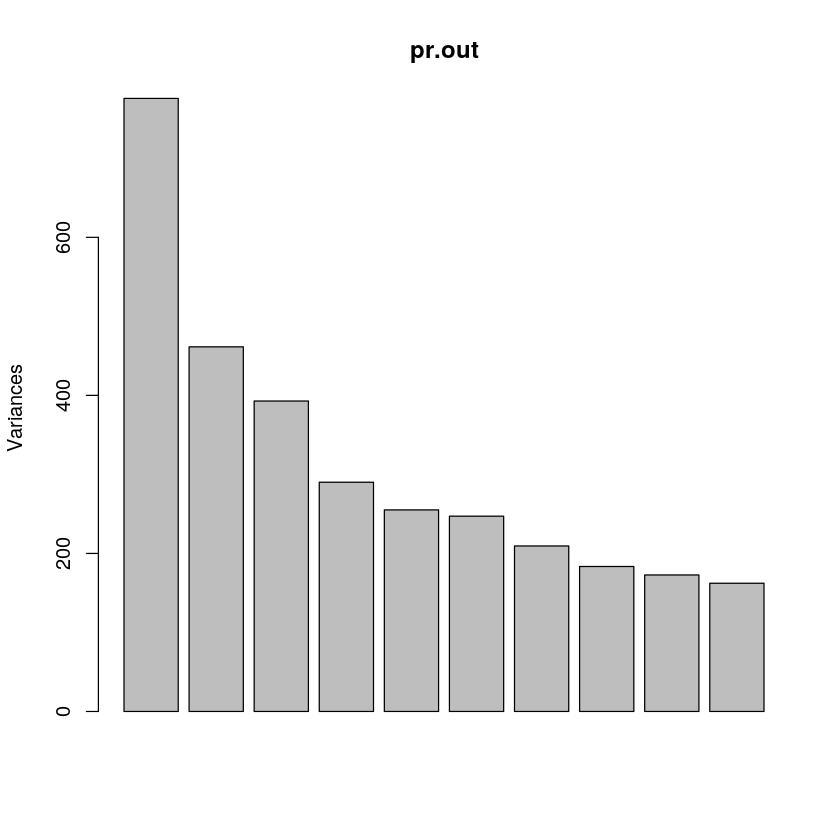

In [23]:
summary(pr.out)
plot(pr.out)
pve=100*pr.out$sdev^2/sum(pr.out$sdev^2)


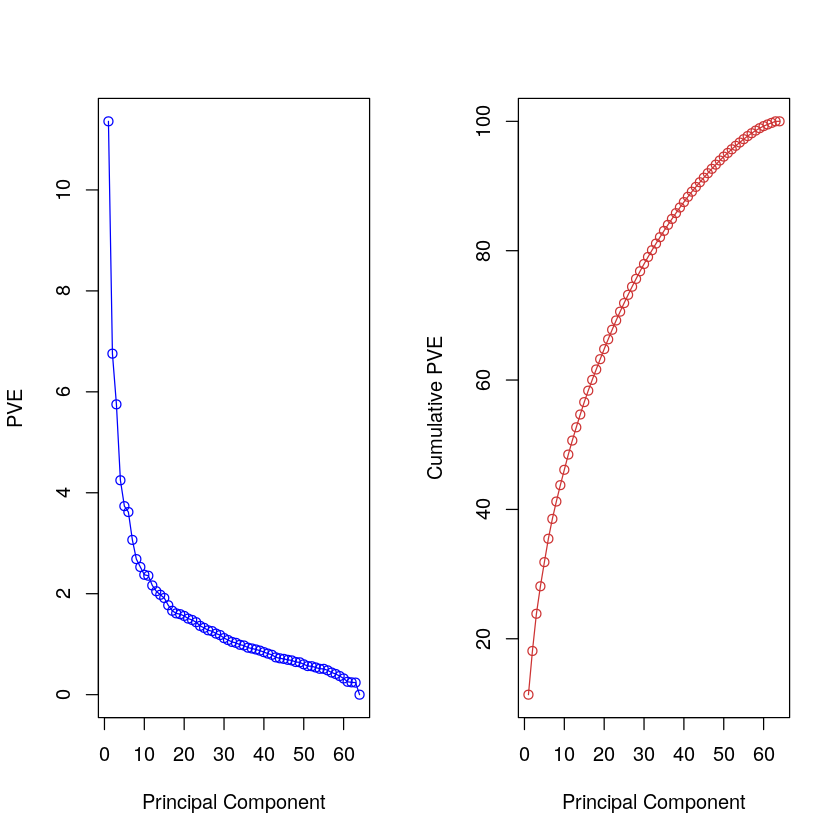

In [24]:
par(mfrow=c(1,2))
plot(pve,  type="o", ylab="PVE", xlab="Principal Component", col="blue")
plot(cumsum(pve), type="o", ylab="Cumulative PVE", xlab="Principal Component", col="brown3")


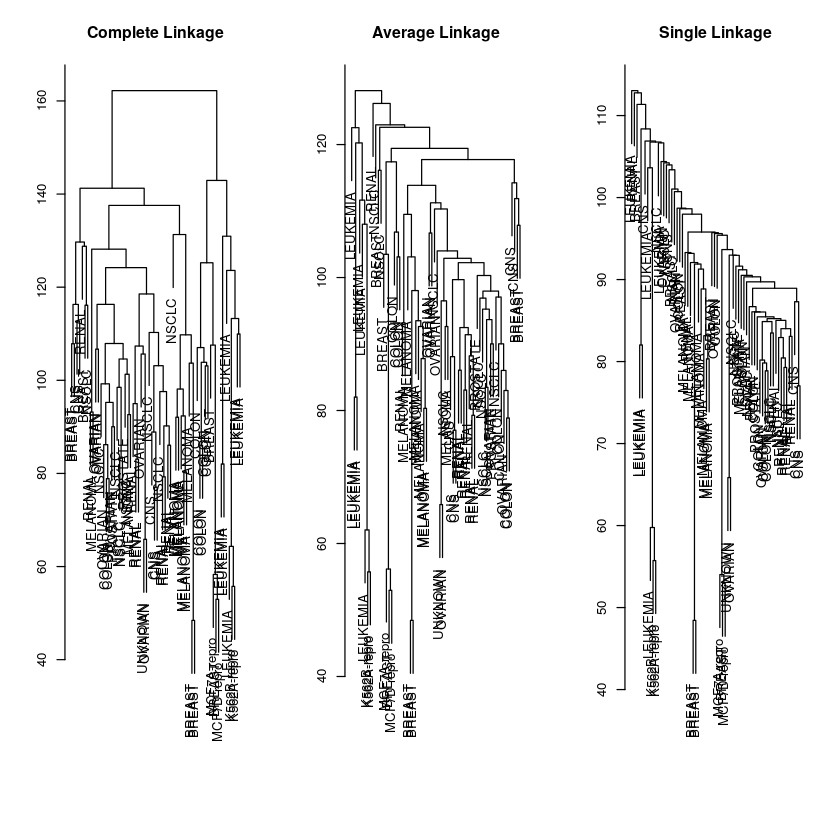

In [25]:
# Clustering the Observations of the NCI60 Data

sd.data=scale(nci.data)
par(mfrow=c(1,3))
data.dist=dist(sd.data)
plot(hclust(data.dist), labels=nci.labs, main="Complete Linkage", xlab="", sub="",ylab="")
plot(hclust(data.dist, method="average"), labels=nci.labs, main="Average Linkage", xlab="", sub="",ylab="")
plot(hclust(data.dist, method="single"), labels=nci.labs,  main="Single Linkage", xlab="", sub="",ylab="")


In [26]:
hc.out=hclust(dist(sd.data))
hc.clusters=cutree(hc.out,4)
table(hc.clusters,nci.labs)


           nci.labs
hc.clusters BREAST CNS COLON K562A-repro K562B-repro LEUKEMIA MCF7A-repro
          1      2   3     2           0           0        0           0
          2      3   2     0           0           0        0           0
          3      0   0     0           1           1        6           0
          4      2   0     5           0           0        0           1
           nci.labs
hc.clusters MCF7D-repro MELANOMA NSCLC OVARIAN PROSTATE RENAL UNKNOWN
          1           0        8     8       6        2     8       1
          2           0        0     1       0        0     1       0
          3           0        0     0       0        0     0       0
          4           1        0     0       0        0     0       0


Call:
hclust(d = dist(sd.data))

Cluster method   : complete 
Distance         : euclidean 
Number of objects: 64 


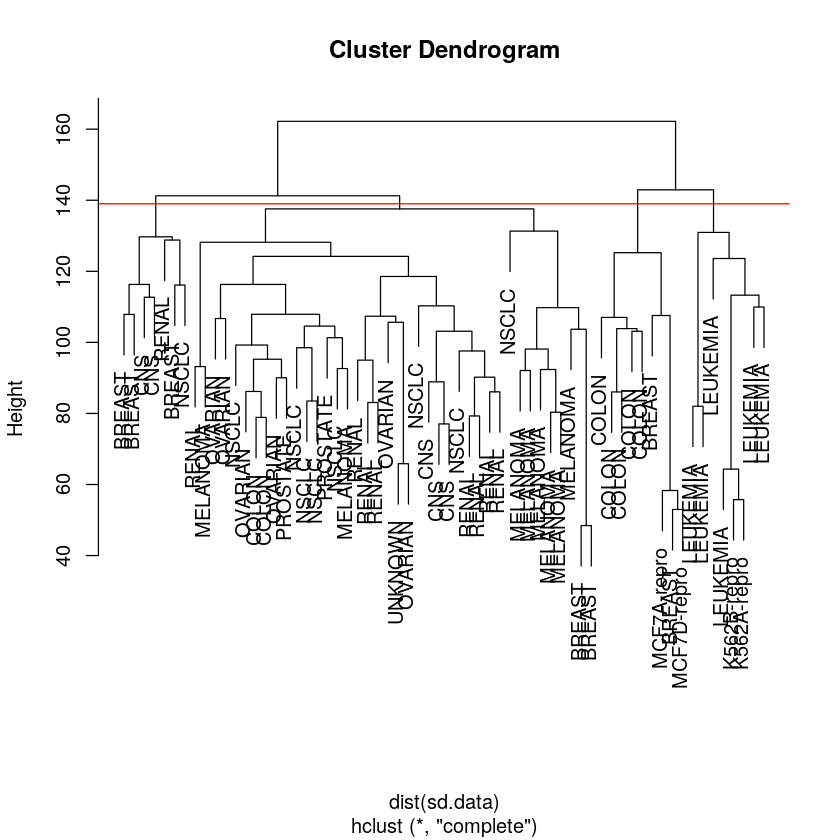

In [27]:
par(mfrow=c(1,1))
plot(hc.out, labels=nci.labs)
abline(h=139, col="red")
hc.out


           hc.clusters
km.clusters  1  2  3  4
          1 11  0  0  9
          2 20  7  0  0
          3  9  0  0  0
          4  0  0  8  0

   nci.labs
    BREAST CNS COLON K562A-repro K562B-repro LEUKEMIA MCF7A-repro MCF7D-repro
  1      0   2     7           0           0        2           0           0
  2      5   3     0           0           0        0           0           0
  3      0   0     0           1           1        4           0           0
  4      2   0     0           0           0        0           1           1
   nci.labs
    MELANOMA NSCLC OVARIAN PROSTATE RENAL UNKNOWN
  1        1     8       5        2     7       0
  2        7     1       1        0     2       1
  3        0     0       0        0     0       0
  4        0     0       0        0     0       0

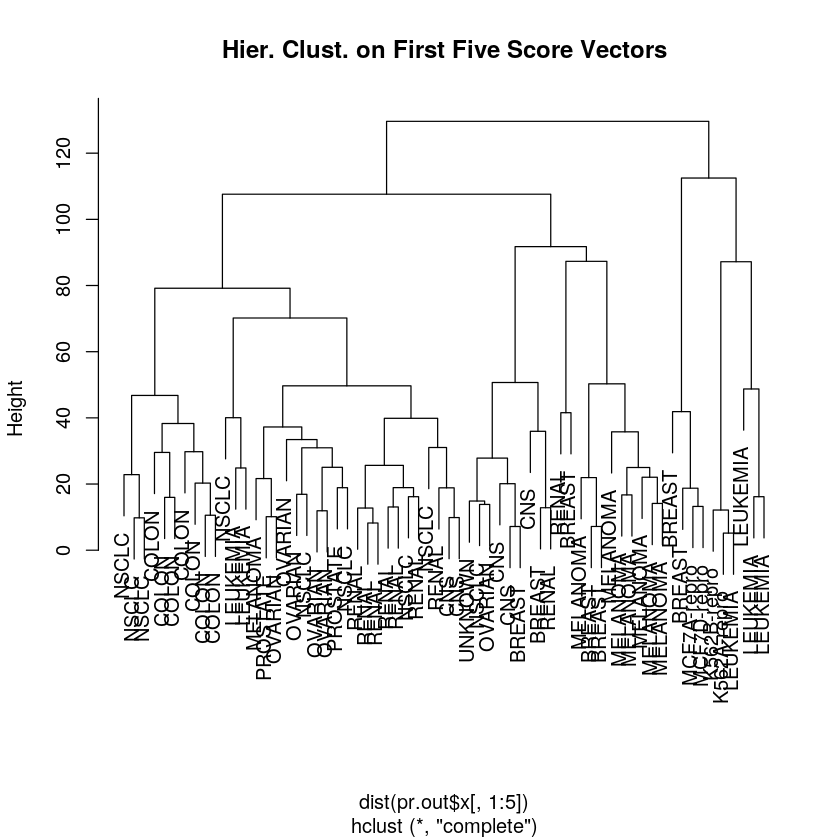

In [28]:
set.seed(2)
km.out=kmeans(sd.data, 4, nstart=20)
km.clusters=km.out$cluster
table(km.clusters,hc.clusters)
hc.out=hclust(dist(pr.out$x[,1:5]))
plot(hc.out, labels=nci.labs, main="Hier. Clust. on First Five Score Vectors")
table(cutree(hc.out,4), nci.labs)

